In [1]:
from urllib.request import Request, urlopen
from urllib.error import URLError,HTTPError
from bs4 import BeautifulSoup
import pandas as pd
import time
from	wordcloud import	WordCloud
from	konlpy.tag import	Okt
from	collections	import	Counter
import	matplotlib.pyplot as	plt
import	platform

In [2]:
name=[]
# 페이지 추출 
for year in range(2015,2024):
    url=f'https://medium.com/daangn/archive/{year}'
    req=Request(f'https://medium.com/daangn/archive/{year}',headers={'User-Agent':'Mozilla/5.0'})
    html=urlopen(req)
    soup = BeautifulSoup(html.read(), 'html.parser')
    time.sleep(5)
    # print(url)
    stremItem=soup.select('h3.graf')
    for i in stremItem:
        # print(title)
        title=i.text.replace("\xa0","").replace("\u200a","").replace("�","").replace("\u200d","").split(' ')
        for i in title:
            name.append(i)

In [3]:
def	make_wordcloud(word_count,	title_list):
    okt =	Okt()
    sentences_tag =	[]
    #	형태소 분석하여 리스트에 넣기
    for	sentence	in	title_list:
        morph	=	okt.pos(sentence)
        sentences_tag.append(morph)
    noun_adj_list =	[]
    for	sentence1	in	sentences_tag:
        for	word,	tag	in	sentence1:
            if	tag	== 'Noun':
                noun_adj_list.append(word)
    #	형태소별 count
    counts	=	Counter(noun_adj_list)
    tags	=	counts.most_common(word_count)

    if	platform.system()	==	'Windows':
        path	=	r'c:\Windows\Fonts\malgun.ttf'
    elif platform.system()	==	'Darwin':		
        path	=	r'/System/Library/Fonts/AppleGothic'
    else:
        path	=	r'/usr/share/fonts/truetype/name/NanumMyeongjo.ttf'
    wc =	WordCloud(font_path=path,	background_color='white',	width=800,	height=600)
    print(dict(tags))
    cloud	=	wc.generate_from_frequencies(dict(tags))
    plt.figure(figsize=(20,	8))
    plt.axis('off')
    plt.imshow(cloud)
    plt.show()


{'창업': 23, '스타트업': 16, '마켓': 12, '풋내기': 11, '자의': 11, '화': 11, '당근': 9, '서비스': 7, '활용': 6, '이미지': 5, '개발': 5, '러닝': 5, '를': 4, '딥': 4, '데이터': 4, '업무': 3, '선택': 3, '추천': 3, '모델': 3, '파이프라인': 3, '팀': 3, '회사': 2, '직원': 2, '법인': 2, '세금': 2, '왜': 2, '의': 2, '유저': 2, '만들기': 2, '페북': 2, '광고': 2, '자동': 2, '더': 2, '용': 2, '기획': 2, '구축': 2, '카테고리': 2, '분류': 2, '이야기': 2, '구글': 2, '동네': 2, '생활': 2, '위': 2, '테스트': 2, '방법': 2, '사용자': 2, '개발자': 2, '미국': 1, '십대': 1, '전동': 1}


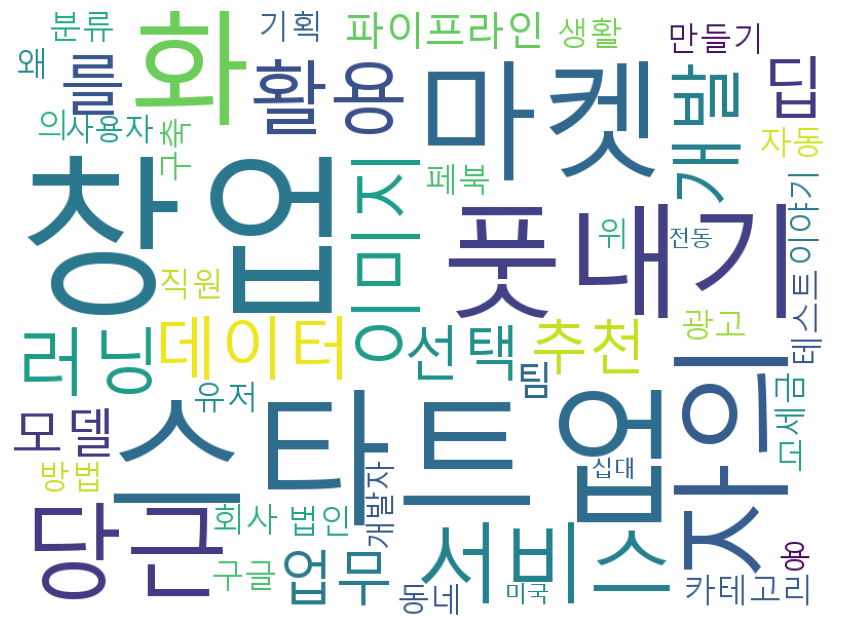

In [6]:
make_wordcloud(50,name)